Importamos las librerias que vamos a utilizar 

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importamos los csv 

In [27]:
dftest = pd.read_csv("hospitalizaciones_test.csv")
dftrain = pd.read_csv("hospitalizaciones_train.csv")

Impeccionamos cada tabla

In [28]:
dftest.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [29]:
dftrain.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


Cambiamos la columna"Stay (in days)" a "pred" tiene que ser menor o igual a 8 para valor 0 y mayor de 8 para valor 1

In [30]:
dftrain["Stay (in days)"] = np.where(dftrain["Stay (in days)"]>8,1,0)   #cambio de valores en las filas
dftrain = dftrain.rename(columns={"Stay (in days)":"pred"}) #cambio de nombre de columna

La columna Age tiene el promedio de edades de los pacientes, en este caso la normalice por su media

In [31]:
df = dftrain["Age"].str.split('-', expand=True)
df[0] = df[0].astype("int32")
df[1] = df[1].astype("int32")
df = ((df[0]+df[1])/2)
df = df.astype("int32")

Aqui pasamos el valor a la columna Age

In [32]:
dftrain["Age"] = df

Visualizamos los cambios

In [33]:
dftrain

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,pred
0,4,gynecology,D,Dr Sophia,0,33070,45,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,35,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,25,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,35,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,75,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,35,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,25,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,25,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,25,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


Utilizo label encoder para convertir las variables categoricas y poder trabajar en ellas

In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

dftrain.Department = le.fit_transform(dftrain.Department)
dftrain.Ward_Facility_Code = le.fit_transform(dftrain.Ward_Facility_Code)
dftrain.doctor_name = le.fit_transform(dftrain.doctor_name)
#dftrain.Age = le.fit_transform(dftrain.Age)
dftrain.gender = le.fit_transform(dftrain.gender)
dftrain['Type of Admission'] = le.fit_transform(dftrain['Type of Admission'])
dftrain['Severity of Illness'] = le.fit_transform(dftrain['Severity of Illness'])
dftrain.health_conditions = le.fit_transform(dftrain.health_conditions)
dftrain.Insurance = le.fit_transform(dftrain.Insurance)

Visualizamos nuevamente

In [35]:
dftrain

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,pred
0,4,2,3,8,0,33070,45,0,1,0,1,4,1,2966.408696,0
1,4,2,1,8,2,34808,35,0,1,1,2,2,0,3554.835677,1
2,2,2,1,8,8,44577,25,0,1,0,1,2,1,5624.733654,0
3,4,2,3,4,7,3695,35,0,2,2,4,4,0,4814.149231,0
4,2,1,4,2,10,108956,75,1,1,2,1,2,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,3,6,1,63105,35,0,1,1,0,3,1,3902.291076,0
409996,5,2,3,3,5,129292,25,0,1,0,5,4,0,4771.995223,1
409997,4,2,3,6,9,11399,25,0,0,1,0,4,1,3816.994210,1
409998,10,2,3,4,10,75003,25,0,1,2,5,2,1,3841.577491,1


Realizo una correlación para identificar los datos que mas afectan al valor de "pred"

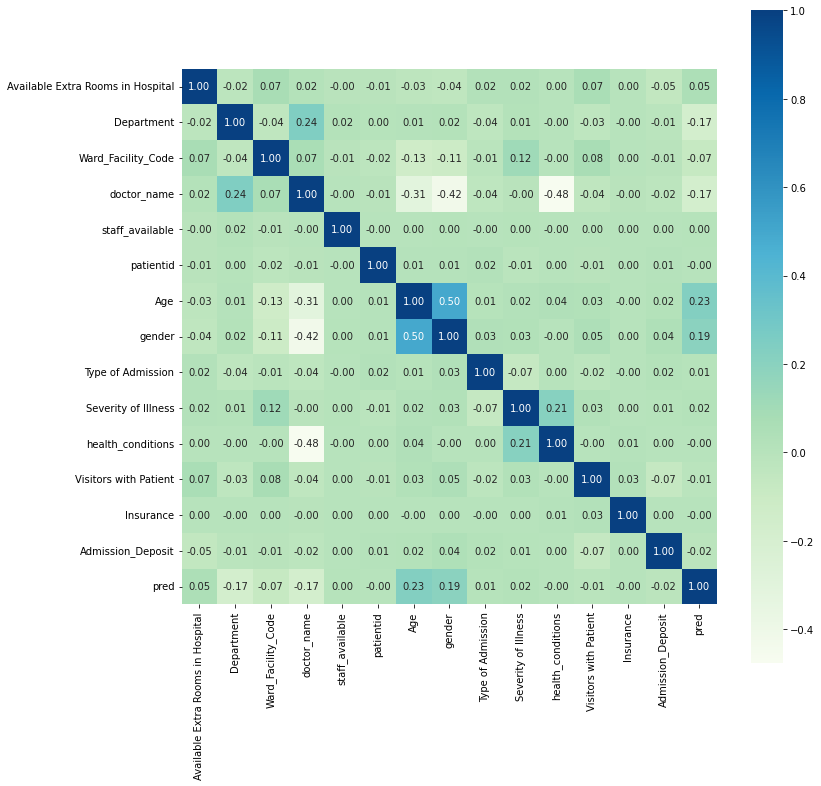

In [36]:
matrizCorrmat = dftrain.corr()
f,ax = plt.subplots(figsize =(12,12))
sns.heatmap(matrizCorrmat, vmax = 1 ,square=True, annot= True,fmt= '.2f', cmap="GnBu")
plt.show()

Como observamos en el Heetmap para "pred", "gender" es el valor que más tiene correlación con un valor de 0.19, seguido de "Age" con un valor de 0.23 y "Available Extra Rooms in Hospital" con un valor de 0.05

Importamos KNeighborsClassifier y DecisionTreeClassifier


In [37]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Le damos los valor que vamos a utilizar

In [38]:
X = dftrain[["Age","gender","Available Extra Rooms in Hospital","Department"]]
y = dftrain["pred"]

Creamos los objetos

In [39]:
knn = KNeighborsClassifier() 
tree = DecisionTreeClassifier()

Divide los datos de prueba y los datos de entrenamiento

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y,test_size=0.22, random_state=11)


Normalizo "dftest" para poder hacer la predicción

In [41]:
df = dftest["Age"].str.split('-', expand=True)
df[0] = df[0].astype("int32")
df[1] = df[1].astype("int32")
df = ((df[0]+df[1])/2)
df = df.astype("int32")
dftest["Age"] = df
dftest.Department = le.fit_transform(dftest.Department)
dftest.Ward_Facility_Code = le.fit_transform(dftest.Ward_Facility_Code)
dftest.doctor_name = le.fit_transform(dftest.doctor_name)
dftest.gender = le.fit_transform(dftest.gender)
dftest['Type of Admission'] = le.fit_transform(dftest['Type of Admission'])
dftest['Severity of Illness'] = le.fit_transform(dftest['Severity of Illness'])
dftest.health_conditions = le.fit_transform(dftest.health_conditions)
dftest.Insurance = le.fit_transform(dftest.Insurance)

resultado = dftest[["Age","gender","Available Extra Rooms in Hospital","Department"]]

Carga la muestra de los entrenamientos y los objetivos 

In [42]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [43]:
tree.fit(X, y)

DecisionTreeClassifier()

Hacemos la prediccion

In [44]:
prediccion = knn.predict(xtest)

Predecimos sobre nuestro set de entrenamieto y nuestro set de testeo

In [45]:
from sklearn.metrics import accuracy_score
y_train_pred = tree.predict(xtrain)
y_test_pred = tree.predict(xtest)

Comaparamos con las etiquetas

In [46]:
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,ytrain))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,ytest))

Accuracy sobre conjunto de Train: 0.6939806128830519
Accuracy sobre conjunto de Test: 0.6920842572062085


In [47]:
print(f'{knn.score(xtest,ytest):.2%}')

67.87%


Guardamos el resultado en un Data Frame

In [48]:
dfresultado = knn.predict(resultado)

In [49]:
dfresultado = pd.DataFrame(list(dfresultado), columns=['pred'])
dfresultado.to_csv("Nico-Mulet.csv", index=False, sep=',')